<a href="https://colab.research.google.com/github/therealmolf/ProGAN-on-PokemonDB/blob/master/SAGAN_Redo_on_PokemonDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 48kB/s 
     |████████████████████████████████| 3.8MB 36.7MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 450kB 41.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9361b5d7d4bab01236cddc854cb6b663f3698f3c956f6dd03a8d677ca5ebf0f9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, UpSampling2D, Attention, LeakyReLU
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tqdm import tqdm
import numpy as np

In [5]:
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
from tensorflow.keras import initializers

# K is just the backend used for Keras for backwards compatibility and other more specific tasks
#  if im just gonna do operations on tensors, might was well use tf native api
import tensorflow.keras.backend as K
from tensorflow.keras.constraints import Constraint

In [7]:
import PIL
import PIL.Image
import pathlib
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [8]:
import cv2

# Data Preprocessing to Training


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
PATH = '/content/drive/My Drive/Datasets/pokemon_dataset unzipped'
path = pathlib.Path(PATH)
image_count = len(list(path.glob('*/*.jpg')))
print(image_count)

888


888
/content/drive/My Drive/Datasets/pokemon_dataset unzipped/pokemon_dataset/Clefable.jpg


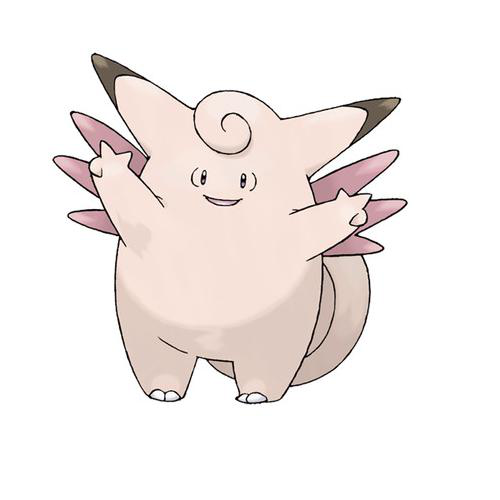

In [11]:
pokemons = list(path.glob('pokemon_dataset/*.jpg'))
print(len(pokemons))
print(pokemons[125])
PIL.Image.open(str(pokemons[125]))

In [ ]:
poke = load_img(pokemons[125])
print(type(poke))
poke_num = img_to_array(poke)
print(type(poke_num))
print(poke_num.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(500, 500, 3)


In [ ]:
?cv2.imread

<class 'numpy.ndarray'>
(256, 256, 3)
(1, 256, 256, 3)


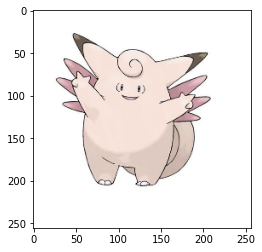

In [ ]:
poke_num = cv2.imread(str(pokemons[125]))
print(type(poke_num))
res = cv2.resize(poke_num,dsize=(256, 256))
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res)
print(res.shape)
new_res = res.reshape([1, 256, 256, 3])
print(new_res.shape)

In [ ]:
?tf.strings.split

In [ ]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape
def resize(filename):
  poke_num = cv2.imread(str(filename))
  # bilinear interpolation by default
  res = cv2.resize(poke_num,(256, 256), cv2.INTER_AREA)
  res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
  return res

# creating np array dataset
# train_images = np.empty([1, 256, 256, 3])
i = 0
for filename in tqdm(pokemons):
  new_img = resize(filename)
  if i == 0:
    train_images = new_img.reshape([1,256,256, 3])
    i += 1
  else:
    b = new_img.reshape([1,256,256, 3])
    train_images = np.append(train_images, b, axis=0)
    


'''
list_ds = tf.data.Dataset.list_files(str(PATH+ "/pokemon_dataset/*"))
print(type(list_ds))

file_path = next(iter(list_ds))
print(file_path)
image = resize(file_path)

train_images = list_ds.map(resize)

for image in train_images.take(2):
  plt.imshow(image)
'''

  6%|▋         | 56/888 [00:12<02:59,  4.64it/s]

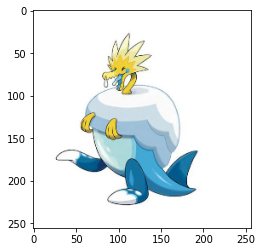

In [ ]:
# (train_images, train_labels), (_, _) = cifar10.load_data()
plt.imshow(train_images[25]);

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
train_images.shape

(888, 256, 256, 3)

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 256,256, 3).astype('float32')
train_images.shape
# print(train_images.dtype)
train_images = (train_images/255) *2 - 1
# train_labels = train_labels.astype('int32')

In [ ]:
BUFFER_SIZE = 50000
BATCH_SIZE = 16
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# allows reading and training in parallel
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
?train_dataset.*

In [ ]:
for batch in train_dataset:
  print(batch.shape)
  break

(16, 256, 256, 3)


In [ ]:
len(list(train_dataset))

56

In [ ]:
# # CBN data loader
# image_dataset = tf.data.Dataset.from_tensor_slices(train_images)
# label_dataset = tf.data.Dataset.from_tensor_slices(train_labels)
# cbn_train_dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
# cbn_train_dataset = cbn_train_dataset.batch(BATCH_SIZE, drop_remainder=True)
# cbn_train_dataset = cbn_train_dataset.shuffle(buffer_size=BUFFER_SIZE)
# cbn_train_dataset = cbn_train_dataset.prefetch(buffer_size=AUTOTUNE)

# Functions and Classes

In [ ]:
# SPECTRAL NORM BY derek wilcox

def l2_normalize(x, eps=1e-12):
  '''
    returns scaled x by the its euclidean norm
  '''
  return x / tf.linalg.norm(x + eps)

POWER_ITERATIONS = 5


class Spectral_Norm(Constraint):
  '''
  Uses power iteration method to calc a fast approximation of spectral
  norm
  the weights are then scaled by spectral norm
  '''
  def __init__(self, power_iters=POWER_ITERATIONS):
    self.n_iters = power_iters

  def __call__(self, w):
    # im not sure if the flatten line really does anything
    flattened_w = tf.reshape(w, [w.shape[0], -1])
    # initialize u from isotropic distribution
    u = tf.random.normal([flattened_w.shape[0]])
    # approximate spectral norm via power iteration
    for i in range(self.n_iters):
      v = tf.linalg.matvec(tf.transpose(flattened_w), u)
      v = l2_normalize(v)
      u = tf.linalg.matvec(flattened_w, v)
      u = l2_normalize(u)
    sigma = tf.tensordot(u, tf.linalg.matvec(flattened_w, v),axes=1)
    # normalize
    return w / sigma

  def get_config(self):
    return {'n_iters': self.n_iters}


In [ ]:
# SELF ATTENTION by derek wilcox
# we have the option to use this and the attention layer of tensorflow
class SelfAttentionBlock(Model):
  def __init__(self):
    super().__init__()
    self.sigma = K.variable(0.0, name='sigma')
    self.phi_pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
    self.g_pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
  # lazy batch creation
  def build(self, inp):
    # we've chosen to use build because of the possibly
    # varying n_channels
    batch_size, h, w, n_channels = inp
    self.batch_size = batch_size
    self.n_channels = n_channels
    self.h = h
    self.w = w

    # number of regions: C
    self.location_num = h*w
    self.downsampled_num = self.location_num // 4

    self.filt = n_channels // 8
    self.query = Conv2D(filters=self.filt,
                        kernel_size=[1,1],
                        padding='same')
    self.key = Conv2D(filters=self.filt,
                        kernel_size=[1,1],
                        padding='same')
    self.v_function = Conv2D(self.n_channels, kernel_size=[1,1])
    self.value = Conv2D(filters=n_channels//2,
                        kernel_size=[1,1])
    
  def call(self, x):
    query = self.query(x)
    # query = query.shape(self.batch_size, self.location_num,self.filt)
    # i feel like its having a prob because of None  batch size
    query = tf.reshape(query, [tf.shape(x)[0], self.location_num, 
                               self.filt])
    
    key = self.key(x)
    key = self.phi_pool(key)
    key = tf.reshape(key, [tf.shape(x)[0], self.downsampled_num, 
                               self.filt])
    
    energy = tf.matmul(query, key, transpose_b=True)
    attention = tf.nn.softmax(energy)

    
    value = self.value(x)
    value = self.g_pool(value)
    value = tf.reshape(value, [tf.shape(x)[0], self.downsampled_num,
                               self.n_channels // 2])
    
    attn_g = tf.matmul(attention, value)
    attn_g = tf.reshape(attn_g, [tf.shape(x)[0], self.h, self.w,
                                 self.n_channels//2])
    
    attn_g = self.v_function(attn_g)
    return x + (attn_g * self.sigma)
    

    


In [ ]:
# LOSS FUNCTIONS FOR DISC AND GEN

def generator_hinge_loss(fake_output):
  # return -1 * tf.reduce_mean(fake_output)
  return -1* K.mean(fake_output)

def discriminator_hinge_loss(real_output, fake_output):
  loss = K.mean(K.relu(1. - real_output))
  loss += K.mean(K.relu(-1. + fake_output))
  # loss = tf.reduce_mean(tf.nn.relu(1. - real_output))
  # loss += tf.reduce_mean(tf.nn.relu(1. + fake_output))
  return loss


In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 8
seed = tf.random.normal([BATCH_SIZE, 1, 1, noise_dim])

In [ ]:
def generate_and_save_images(model, epoch, test_input, bn_type):
  if bn_type == "cbn":
    label = tf.convert_to_tensor(np.random.randint(0, 10, 100))
    label = tf.squeeze(label)
    predictions = model(test_input, label)
  elif bn_type == "sbn":
    predictions = model(test_input)
  else:
    predictions = model(test_input, training=False) 
  
  fig = plt.figure(figsize=(4,4))
  
  for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow((predictions[i]+1)/2)
    plt.axis('off')
  
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
# TRAIN FUNCTIONS by derek wilcox

@tf.function
def train_step(images, labels=None, disc_steps=1):
  for _ in range(disc_steps):
    with tf.GradientTape() as disc_tape:
      noise = tf.random.normal([BATCH_SIZE, 1,1, noise_dim])
      if labels is not None:
        generated_images = generator(noise, labels)
      else:
        generated_images = generator(noise, training=True)
      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)
      disc_loss = discriminator_hinge_loss(real_output, fake_output)
      grad_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
      disc_optimizer.apply_gradients(zip(grad_disc, discriminator.trainable_variables))

  with tf.GradientTape() as gen_tape:
    noise = tf.random.normal([BATCH_SIZE, 1, 1, noise_dim])
    if labels is not None:
      generated_images = generator(noise, labels)
    else:
      generated_images = generator(noise, training=True)
    fake_output = discriminator(generated_images, training=False)
    gen_loss = generator_hinge_loss(fake_output)
    gen_grad = gen_tape.gradient(gen_loss, generator.trainable_weights)
    gen_optimizer.apply_gradients(zip(gen_grad, generator.trainable_weights))

    # not sure what this part is for
    singular_values = tf.linalg.svd(discriminator.trainable_variables[-2])[0]
    condition_number = tf.reduce_max(singular_values)

    train_stats = {'d_loss': disc_loss, 'g_loss': gen_loss,
                   'd_grads': grad_disc, 'g_grads': gen_grad,
                   'cond_number': condition_number}
    return train_stats


In [ ]:
from tqdm import tqdm

def train(dataset, epochs, bn_type=None):
  for epoch in tqdm(range(epochs)):
    for batch in dataset:
      train_dict = train_step(batch)

    with train_summary_writer.as_default():
      tf.summary.scalar('disc_total_loss', train_dict['d_loss'], step=epoch)
      tf.summary.scalar('gen_total_loss', train_dict['g_loss'], step=epoch)
    
    print("Discrminator Loss at Epoch {0}: {1}".format(epoch+1, train_dict['d_loss']))
    print("Generator Loss at Epoch {0}: {1}".format(epoch+1, train_dict['g_loss']))

    # generate image using helper function
    generate_and_save_images(generator,
                             epoch + 1,
                             seed, bn_type)

    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)


  # Generate after the final epoch
  generate_and_save_images(generator,
                           epochs,
                           seed, bn_type)
    


In [ ]:
# idk how this works yet
# %tensorboard --logdir logs/gradient_tape

# SAGAN MODELS


In [ ]:
# test version of discriminator model

# conv2d
# specnorm
# leakyrel
# conv2d
# specnorm
# leakyrel
# split previous layer to query, key, value
# attention layer 1
# conv2d
# flatten


# discriminator in functional api
x = Input(shape=(256, 256, 3), batch_size=None)
# 256 x 256
conv_1 = Conv2D(32, 5,  1,padding='same', kernel_constraint=Spectral_Norm())(x)
leaky_relu_1 = LeakyReLU(0.1)(conv_1)
# 128x128
conv_2 = Conv2D(64, 5, 2, padding='same',kernel_constraint=Spectral_Norm())(leaky_relu_1)
leaky_relu_2 = LeakyReLU(0.1)(conv_2)
# 64x64
conv_3 = Conv2D(128, 5, 2,padding='same', kernel_constraint=Spectral_Norm())(leaky_relu_2)
leaky_relu_2 = LeakyReLU(0.1)(conv_3)
# 32x32
conv_4 = Conv2D(256, 5, 2,padding='same', kernel_constraint=Spectral_Norm())(leaky_relu_2)
leaky_relu_3 = LeakyReLU(0.1)(conv_4)
# 16 x 16
conv_5 = Conv2D(512, 5, 2,padding='same', kernel_constraint=Spectral_Norm())(leaky_relu_3)
leaky_relu_4 = LeakyReLU(0.1)(conv_5)
# 8 x 8
conv_6 = Conv2D(1024, 5, 2,padding='same', kernel_constraint=Spectral_Norm())(leaky_relu_4)
flattened_x = Flatten()(conv_6)
out = Dense(1, kernel_constraint=Spectral_Norm())(flattened_x)
discriminator = Model(inputs=x,outputs=out)



# generator in functional api using premade attention block
z = Input(shape=(100,), batch_size=None)
dense_1 = Dense(1024*8*8)(z)
# 8 x 8
reshaped = Reshape([8,8,1024])(dense_1)
# 16 x 16
deconv_1 = Conv2DTranspose(512, 5, 2, padding='same',
                           kernel_constraint=Spectral_Norm(),
                           activation='relu')(reshaped)
# 32 x 32
deconv_2 = Conv2DTranspose(256, 5, 2, padding='same',
                           kernel_constraint=Spectral_Norm(),
                           activation='relu')(deconv_1)
attention_1 = SelfAttentionBlock()(deconv_2)
# 64 x 64
deconv_3 = Conv2DTranspose(128, 5, 2, padding='same',
                           kernel_constraint=Spectral_Norm(),
                           activation='relu')(deconv_2)
attention_1 = SelfAttentionBlock()(deconv_3)
# 128 x 128
deconv_4 = Conv2DTranspose(64, 5, 2, padding='same',
                           kernel_constraint=Spectral_Norm(),
                           activation='relu')(attention_1)
# 256 x 256 
deconv_5 = Conv2DTranspose(32, 5, 2, padding='same',
                           kernel_constraint=Spectral_Norm(),
                           activation='relu')(deconv_4)
generated_1 = Conv2DTranspose(3, 1, padding='same', 
                              kernel_constraint=Spectral_Norm(),
                              activation='tanh')(deconv_5)
generator = Model(inputs=z,outputs=generated_1)



In [ ]:
tf.keras.utils.plot_model(
    generator, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

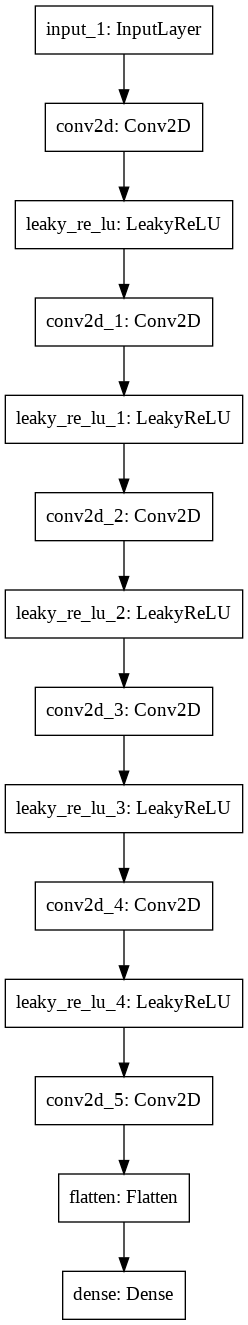

In [ ]:
tf.keras.utils.plot_model(
    discriminator, to_file='disc.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
# test generator
noise = tf.random.normal([3, 1, 1, 100])
print(noise.shape)
generated_image = generator(noise, training=True)
print(generated_image.shape)
plt.imshow((generated_image[1] + 1 )/2);

(3, 1, 1, 100)
(3, 32, 32, 3)


InvalidArgumentError: ignored

# GAN Training

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import datetime
import os

# TRAIN GAN USING TRAIN FUNCTIONS
initial_disc = 0.0004
initial_gen = 0.0001
lr_sched_disc = ExponentialDecay(initial_disc,decay_rate=0.99,
                                 decay_steps=50000*EPOCHS)
lr_sched_gen = ExponentialDecay(initial_gen,decay_rate=0.99,
                                 decay_steps=50000*EPOCHS)
# derek wilcox used beta 1 = 0 and beta 2 = 0.9
gen_optimizer = Adam(learning_rate=initial_gen, beta_1=0.5)
disc_optimizer = Adam(learning_rate=initial_disc, beta_1=0.5)

# checkpoint sand training logs
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(generator_optimizer=gen_optimizer,
                                 discriminator_optimizer=disc_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)



In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
train(dataset=train_dataset,epochs=75)

# Erik Linder Noren Style setup

In [ ]:
class SAGAN():
  def __init__(self):
    #Input shape
    self.img_rows = 32
    self.img_cols = 32
    self.img_channels = 3
    self.img_shape = (self.img_rows, self.img_cols, self.img_channels)
    self.latent_dim = 100

    optimizer = Adam(0.002, 0.5)

    # build and compile discrminator
    self.discriminator = build_discriminator()
    self.discriminator.compile(loss='binary_cross_entropy',
                               optimizer=optimizer,
                               metrics=['accuracy'])
    
    # Build the generator
    self.generator = self.build_generator()

    # The generator takes noise as input and generates imgs
    z = Input(shape=(self.latent_dim,))
    img = self.generator(z)

    # For the combined model we will only train the generator
    self.discriminator.trainable = False

    # The discriminator takes generated images as input and determines validity
    valid = self.discriminator(img)

    # The combined model  (stacked generator and discriminator)
    # Trains the generator to fool the discriminator
    self.combined = Model(z, valid)
    self.combined.compile(loss='binary_crossentropy', optimizer=optimizer) 

  def build_discriminator(self):
    pass

  def build_generator(self):
    pass
  
  def train(self):
    pass


